In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats
from get_draws.api import get_draws

In [2]:
output_dirs = ['/share/costeffectiveness/results/vivarium_conic_lsff/india/2020_06_26_20_35_00/count_data/',
              '/share/costeffectiveness/results/vivarium_conic_lsff/nigeria/2020_06_26_20_28_27/count_data/']

locations = ['India','Nigeria']

In [5]:
csmrs = pd.DataFrame()
for i in range(len(output_dirs)):
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf')
    deaths = deaths.loc[deaths.year != '2020']
    deaths = deaths.groupby(['input_draw','age_group','scenario','cause']).sum()
    pt = pd.read_hdf(output_dirs[i] + 'state_person_time.hdf')
    pt = pt.loc[pt.cause.str.contains('diarrheal')]
    pt = pt.loc[pt.year != '2020']
    pt = pt.groupby(['input_draw','age_group','scenario','year']).sum()
    csmr = deaths / pt
    csmr = csmr.reset_index()
    csmr['location'] = locations[i]
    csmrs = csmrs.append(csmr)
csmrs['value'] = csmrs['value'] * 100_000
csmrs.head()

,input_draw,age_group,scenario,cause,year,value,location
0,21,1_to_4,baseline,diarrheal_diseases,2021,63.554340,India
1,21,1_to_4,baseline,diarrheal_diseases,2022,65.435614,India
2,21,1_to_4,baseline,diarrheal_diseases,2023,67.175603,India
3,21,1_to_4,baseline,lower_respiratory_infections,2021,67.406118,India
4,21,1_to_4,baseline,lower_respiratory_infections,2022,69.401409,India


In [7]:
def make_multiple_plots_by_year_and_cause(dataset, locations, causes, scenarios):
    for location in locations:
            for cause in causes:
                for scenario in scenarios:
                    data = dataset.loc[dataset.location == location]
                    data = data.loc[data.cause == cause]
                    data = data.groupby(['location','scenario','year']).describe().reset_index()

                    baseline = data.loc[data.scenario == 'baseline']
                    intervention = data.loc[data.scenario == scenario]

                    fig, ax = plt.subplots(figsize=(7.5, 5))

                    plt.scatter(baseline['year'], baseline['value','mean'])
                    plt.plot(baseline['year'], baseline['value','mean'])

                    plt.scatter(intervention['year'], intervention['value','mean'])
                    plt.plot(intervention['year'], intervention['value','mean'])

                    plt.fill_between(baseline['year'],baseline['value','max'],baseline['value','min'], alpha=0.3,color='tab:blue')
                    plt.fill_between(intervention['year'],intervention['value','max'],intervention['value','min'], alpha=0.3,color='tab:orange')

                    cause_title = cause.replace('_',' ').capitalize()
                    scenario_title = scenario.replace('_',' ').capitalize()

                    plt.title(f'{location}\n Cause Specific Mortality Rate (per 100,000 Person Years) for {cause_title}')
                    plt.legend(['Baseline',f'{scenario}'])
                    plt.ylabel(f'{cause_title} CSMR per 100,000 PR')
                    #plt.savefig(f'csmr_{location}_{scenario}_{cause}.png')

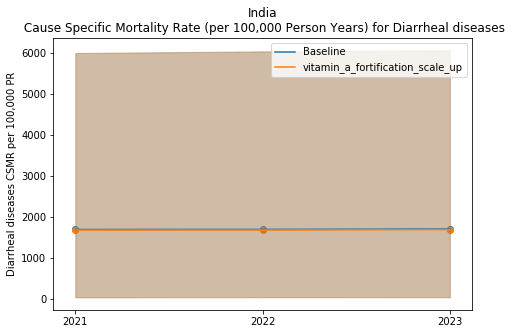

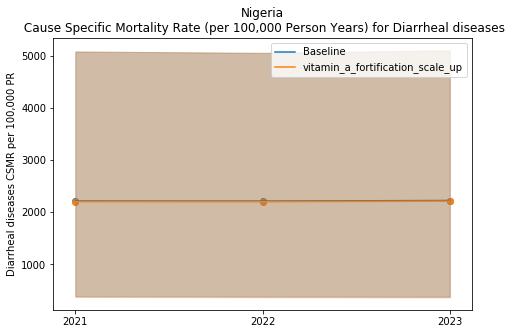

In [9]:
dataset = csmrs
locs = locations
causes = ['diarrheal_diseases']
scenarios = ['vitamin_a_fortification_scale_up']

make_multiple_plots_by_year_and_cause(dataset, locs, causes, scenarios)